In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from datetime import datetime

In [2]:
df = pd.read_csv("IMDb ratings.csv",low_memory=False)
df.head(2)
df2= pd.read_csv("IMDb movies.csv",low_memory=False)
df2.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [3]:
df_merge = df2.merge(df, how='left', left_on='imdb_title_id', right_on='imdb_title_id')
df_merge


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Film

<AxesSubplot:xlabel='year'>

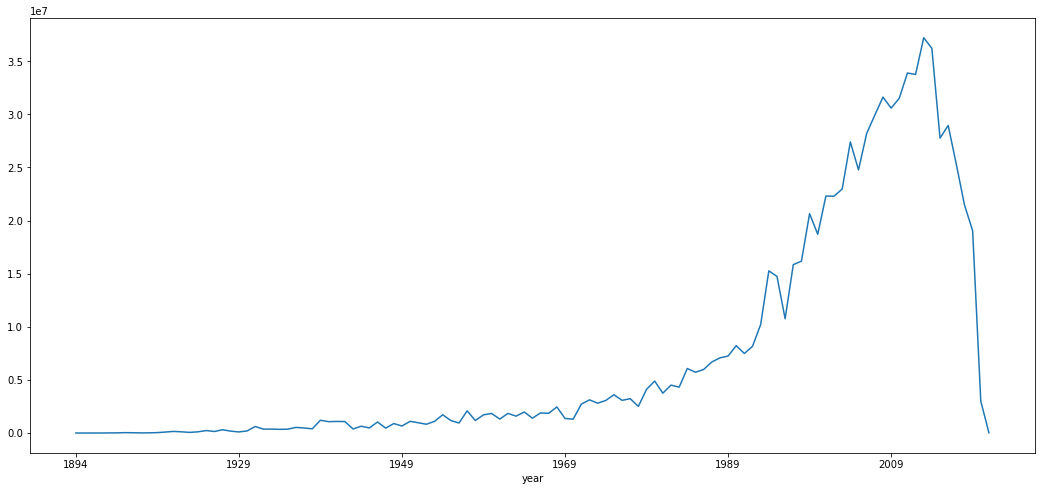

In [4]:
df_merge.groupby('year')['total_votes'].sum().plot(figsize=(18,8))

In [5]:
plt.figure(figsize=(18,8))
sns.barplot(x="Name", y="Total_Shipped", data=pc_top).set_title('Median vote per year')
plt.xticks(rotation=45)

plt.show()
df_merge.groupby('year')['median_vote'].sum().plot(figsize=(18,8))

NameError: name 'sns' is not defined

<Figure size 1296x576 with 0 Axes>

In [6]:
genre_list=['Drama','Crime','Comedy','Horror','Mystery','Fantasy','Family','Adventure','History','Western','War','Romance','Action','Sci-Fi','Biography','Thriller','Sport','Film-Noir','Musical','Music']

In [7]:
def check_string(lst, word):
    if lst is np.nan:
        pass
    elif lst.count(word):
        return 1
    else:
        return 0

In [8]:

for genres in genre_list:
    df_merge[genres] = list(map(lambda x: check_string(x, genres), df_merge['genre']))

df_merge.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,Drama,Crime,Comedy,Horror,Mystery,Fantasy,Family,Adventure,History,Western,War,Romance,Action,Sci-Fi,Biography,Thriller,Sport,Film-Noir,Musical,Music
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
df_merge[(df_merge['Drama'] == 1) | (df_merge['Comedy'] == 1) | (df_merge['Fantasy'] == 1) | (df_merge['Sci-Fi'] == 1) | (df_merge['Crime'] == 1) | (df_merge['Horror'] == 1) | (df_merge['Mystery'] == 1) | (df_merge['Family'] == 1) | (df_merge['Adventure'] == 1) | (df_merge['History'] == 1) | (df_merge['Western'] == 1) | (df_merge['War'] == 1) | (df_merge['Romance'] == 1) | (df_merge['Action'] == 1) | (df_merge['Biography'] == 1) | (df_merge['Thriller'] == 1) | (df_merge['Sport'] == 1) | (df_merge['Film-Noir'] == 1) | (df_merge['Musical'] == 1) | (df_merge['Music'] == 1)].head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,Drama,Crime,Comedy,Horror,Mystery,Fantasy,Family,Adventure,History,Western,War,Romance,Action,Sci-Fi,Biography,Thriller,Sport,Film-Noir,Musical,Music
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
df_dr = df_merge[(df_merge['Drama'] == 1)].groupby('year').count()
df_sci = df_merge[(df_merge['Sci-Fi'] == 1)].groupby('year').count()
df_dr.imdb_title_id.head(8)
df_sci.imdb_title_id.head(8)

year
1913    1
1916    2
1918    1
1920    2
1921    1
1923    1
1924    1
1925    1
Name: imdb_title_id, dtype: int64

In [9]:
dr = df_merge[(df_merge['Drama'] == 1)].groupby('year')['imdb_title_id'].count()
sci = df_merge[(df_merge['Sci-Fi'] == 1)].groupby('year')['imdb_title_id'].count()

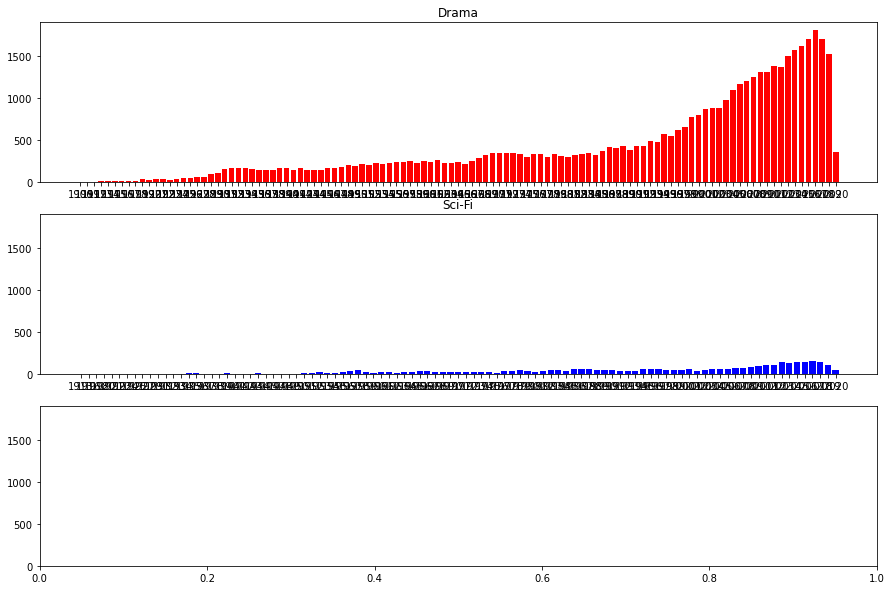

In [19]:
fig, axes = plt.subplots(3, 1,figsize=(15,10),sharey=True,sharex=False)
axes[0].bar(dr.keys(), dr.values, color='r', label='Drama') 
axes[0].set_title('Drama')
axes[1].bar(sci.keys(), sci.values, color='b', label='Sci-Fi')
axes[1].set_title('Sci-Fi')

None

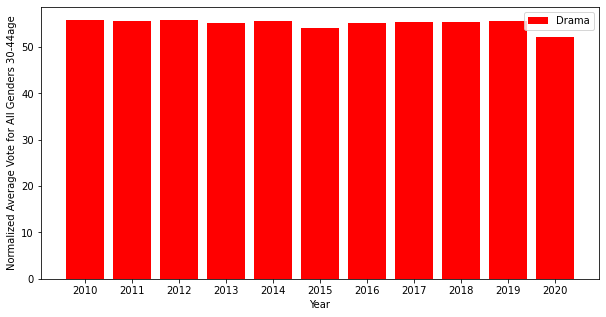

In [11]:
df_dr = df_merge[(df_merge['Drama'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_dr_min = df_dr['allgenders_30age_avg_vote'].min()
df_dr_max = df_dr['allgenders_30age_avg_vote'].max()
df_dr['normalized_allgenders_30age_avg_vote'] = (df_dr['allgenders_30age_avg_vote'] - df_dr_min) / (df_dr_max - df_dr_min) * 100

ratings_dr = df_dr[df_dr['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_dr.keys(), ratings_dr.values, color='r', label='Drama')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()

None

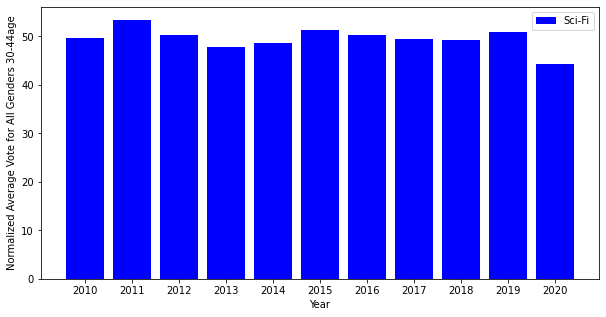

In [12]:
df_sci = df_merge[(df_merge['Sci-Fi'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_sci_min = df_sci['allgenders_30age_avg_vote'].min()
df_sci_max = df_sci['allgenders_30age_avg_vote'].max()
df_sci['normalized_allgenders_30age_avg_vote'] = (df_sci['allgenders_30age_avg_vote'] - df_sci_min) / (df_sci_max - df_sci_min) * 100

ratings_sci = df_sci[df_sci['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_sci.keys(), ratings_sci.values, color='b', label='Sci-Fi')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

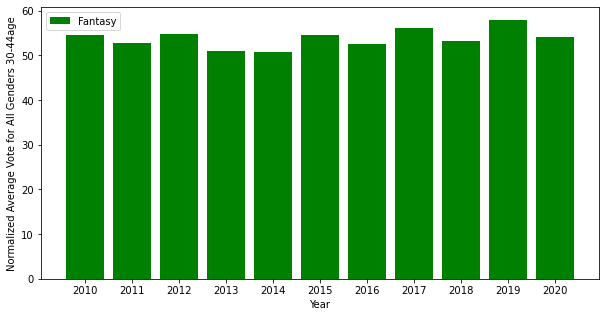

In [13]:
df_fan = df_merge[(df_merge['Fantasy'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_fan_min = df_fan['allgenders_30age_avg_vote'].min()
df_fan_max = df_fan['allgenders_30age_avg_vote'].max()
df_fan['normalized_allgenders_30age_avg_vote'] = (df_fan['allgenders_30age_avg_vote'] - df_fan_min) / (df_fan_max - df_fan_min) * 100

ratings_fan = df_fan[df_fan['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_fan.keys(), ratings_fan.values, color='g', label='Fantasy')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

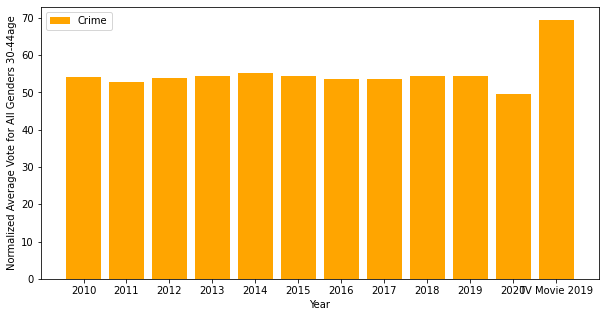

In [14]:
df_cr = df_merge[(df_merge['Crime'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_cr_min = df_cr['allgenders_30age_avg_vote'].min()
df_cr_max = df_cr['allgenders_30age_avg_vote'].max()
df_cr['normalized_allgenders_30age_avg_vote'] = (df_cr['allgenders_30age_avg_vote'] - df_cr_min) / (df_cr_max - df_cr_min) * 100

ratings_cr = df_cr[df_cr['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_cr.keys(), ratings_cr.values, color='orange', label='Crime')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

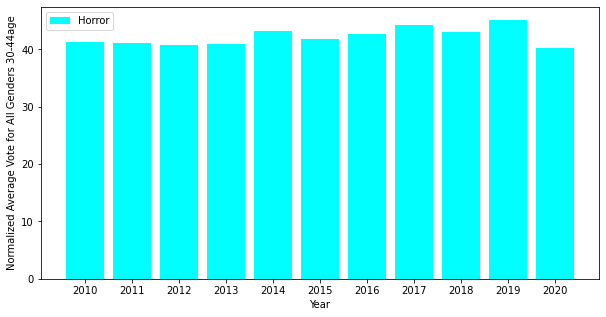

In [15]:
df_ho = df_merge[(df_merge['Horror'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_ho_min = df_ho['allgenders_30age_avg_vote'].min()
df_ho_max = df_ho['allgenders_30age_avg_vote'].max()
df_ho['normalized_allgenders_30age_avg_vote'] = (df_ho['allgenders_30age_avg_vote'] - df_ho_min) / (df_ho_max - df_ho_min) * 100

ratings_ho = df_ho[df_ho['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_ho.keys(), ratings_ho.values, color='cyan', label='Horror')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

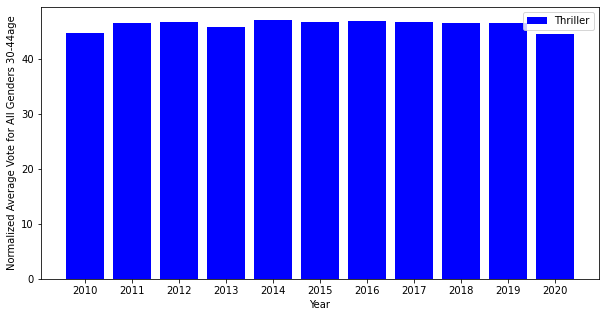

In [16]:
df_th = df_merge[(df_merge['Thriller'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_th_min = df_th['allgenders_30age_avg_vote'].min()
df_th_max = df_th['allgenders_30age_avg_vote'].max()
df_th['normalized_allgenders_30age_avg_vote'] = (df_th['allgenders_30age_avg_vote'] - df_th_min) / (df_th_max - df_th_min) * 100

ratings_th = df_th[df_th['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_th.keys(), ratings_th.values, color='b', label='Thriller')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None


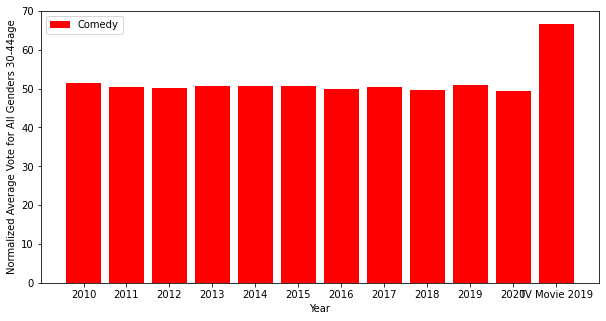

In [17]:
df_co = df_merge[(df_merge['Comedy'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_co_min = df_co['allgenders_30age_avg_vote'].min()
df_co_max = df_co['allgenders_30age_avg_vote'].max()
df_co['normalized_allgenders_30age_avg_vote'] = (df_co['allgenders_30age_avg_vote'] - df_co_min) / (df_co_max - df_co_min) * 100

ratings_co = df_co[df_co['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_co.keys(), ratings_co.values, color='r', label='Comedy')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

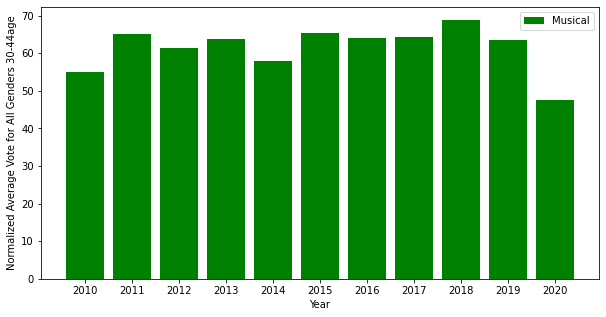

In [18]:
df_mu = df_merge[(df_merge['Musical'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_mu_min = df_mu['allgenders_30age_avg_vote'].min()
df_mu_max = df_mu['allgenders_30age_avg_vote'].max()
df_mu['normalized_allgenders_30age_avg_vote'] = (df_mu['allgenders_30age_avg_vote'] - df_mu_min) / (df_mu_max - df_mu_min) * 100

ratings_mu = df_mu[df_mu['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_mu.keys(), ratings_mu.values, color='g', label='Musical')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

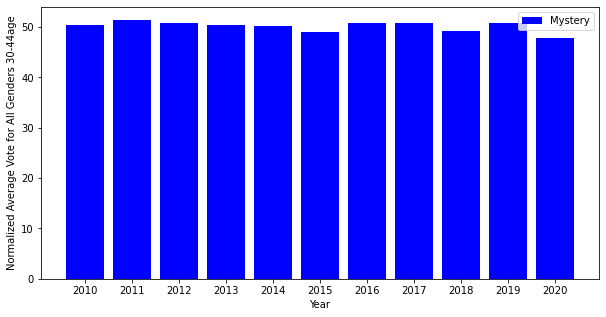

In [19]:
df_my = df_merge[(df_merge['Mystery'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_my_min = df_my['allgenders_30age_avg_vote'].min()
df_my_max = df_my['allgenders_30age_avg_vote'].max()
df_my['normalized_allgenders_30age_avg_vote'] = (df_my['allgenders_30age_avg_vote'] - df_my_min) / (df_my_max - df_my_min) * 100

ratings_my = df_my[df_my['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_my.keys(), ratings_my.values, color='b', label='Mystery')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

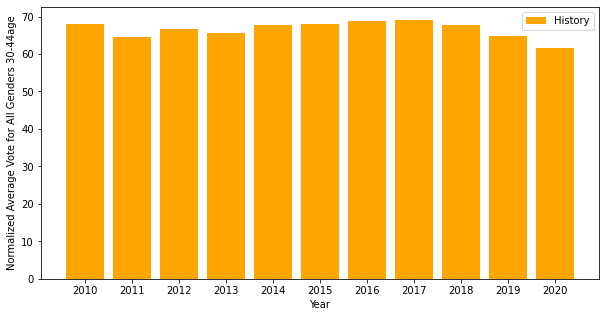

In [20]:
df_h = df_merge[(df_merge['History'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_h_min = df_h['allgenders_30age_avg_vote'].min()
df_h_max = df_h['allgenders_30age_avg_vote'].max()
df_h['normalized_allgenders_30age_avg_vote'] = (df_h['allgenders_30age_avg_vote'] - df_h_min) / (df_h_max - df_h_min) * 100

ratings_h = df_h[df_h['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_h.keys(), ratings_h.values, color='orange', label='History')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')

plt.legend()
plt.show()
None

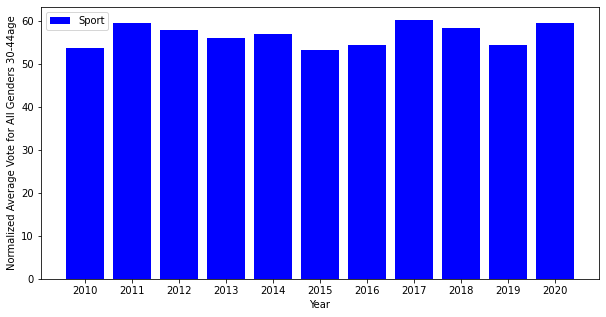

In [21]:
df_sp = df_merge[(df_merge['Sport'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_sp_min = df_sp['allgenders_30age_avg_vote'].min()
df_sp_max = df_sp['allgenders_30age_avg_vote'].max()
df_sp['normalized_allgenders_30age_avg_vote'] = (df_sp['allgenders_30age_avg_vote'] - df_sp_min) / (df_sp_max - df_sp_min) * 100

ratings_sp = df_sp[df_sp['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_sp.keys(), ratings_sp.values, color='b', label='Sport')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

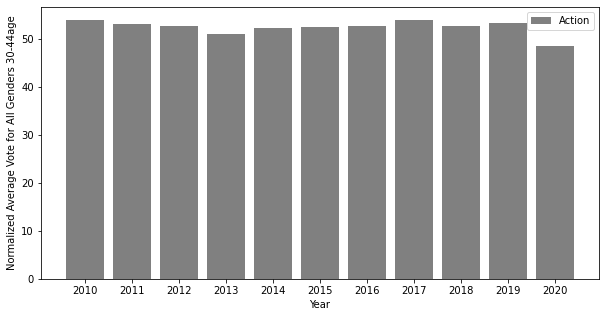

In [22]:
df_ac = df_merge[(df_merge['Action'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_ac_min = df_ac['allgenders_30age_avg_vote'].min()
df_ac_max = df_ac['allgenders_30age_avg_vote'].max()
df_ac['normalized_allgenders_30age_avg_vote'] = (df_ac['allgenders_30age_avg_vote'] - df_ac_min) / (df_ac_max - df_ac_min) * 100

ratings_ac = df_ac[df_ac['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_ac.keys(), ratings_ac.values, color='grey', label='Action')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()

plt.show()
None

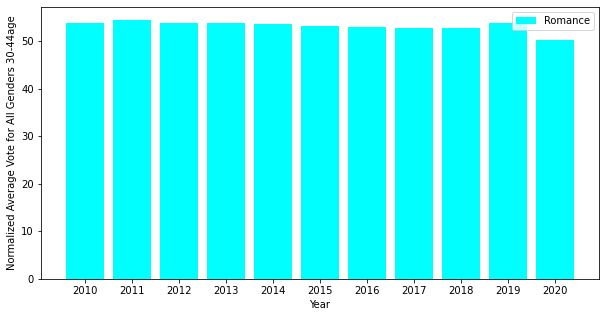

In [23]:
df_ro = df_merge[(df_merge['Romance'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_ro_min = df_ro['allgenders_30age_avg_vote'].min()
df_ro_max = df_ro['allgenders_30age_avg_vote'].max()
df_ro['normalized_allgenders_30age_avg_vote'] = (df_ro['allgenders_30age_avg_vote'] - df_ro_min) / (df_ro_max - df_ro_min) * 100

ratings_ro = df_ro[df_ro['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_ro.keys(), ratings_ro.values, color='cyan', label='Romance')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

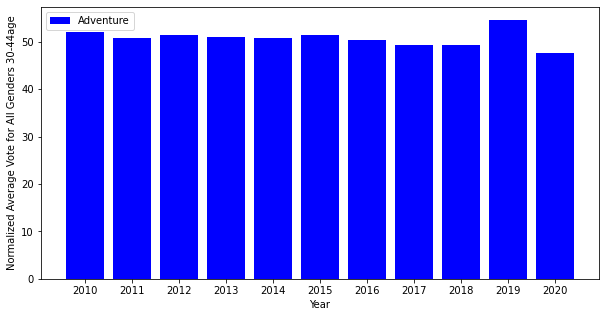

In [24]:
df_ad = df_merge[(df_merge['Adventure'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_ad_min = df_ad['allgenders_30age_avg_vote'].min()
df_ad_max = df_ad['allgenders_30age_avg_vote'].max()
df_ad['normalized_allgenders_30age_avg_vote'] = (df_ad['allgenders_30age_avg_vote'] - df_ad_min) / (df_ad_max - df_ad_min) * 100

ratings_ad = df_ad[df_ad['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_ad.keys(), ratings_ad.values, color='b', label='Adventure')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

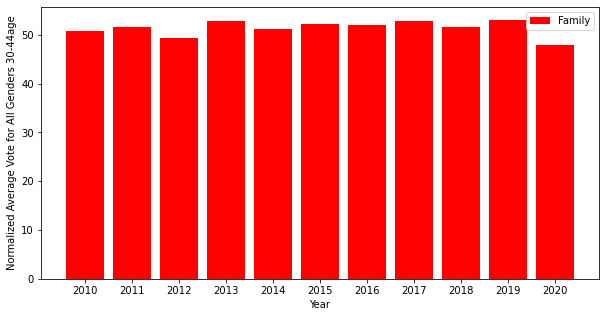

In [25]:
df_fa = df_merge[(df_merge['Family'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_fa_min = df_fa['allgenders_30age_avg_vote'].min()
df_fa_max = df_fa['allgenders_30age_avg_vote'].max()
df_fa['normalized_allgenders_30age_avg_vote'] = (df_fa['allgenders_30age_avg_vote'] - df_fa_min) / (df_fa_max - df_fa_min) * 100

ratings_fa = df_fa[df_fa['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_fa.keys(), ratings_fa.values, color='r', label='Family')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

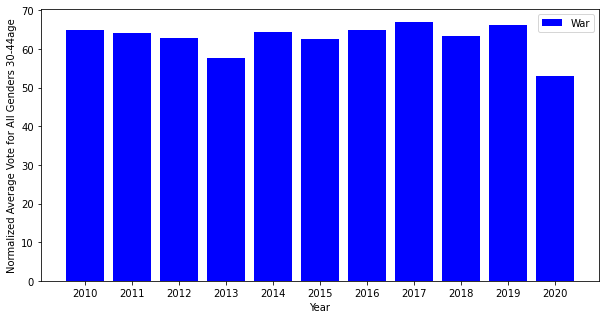

In [26]:
df_w = df_merge[(df_merge['War'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_w_min = df_w['allgenders_30age_avg_vote'].min()
df_w_max = df_w['allgenders_30age_avg_vote'].max()
df_w['normalized_allgenders_30age_avg_vote'] = (df_w['allgenders_30age_avg_vote'] - df_w_min) / (df_w_max - df_w_min) * 100

ratings_w = df_w[df_w['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_w.keys(), ratings_w.values, color='b', label='War')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

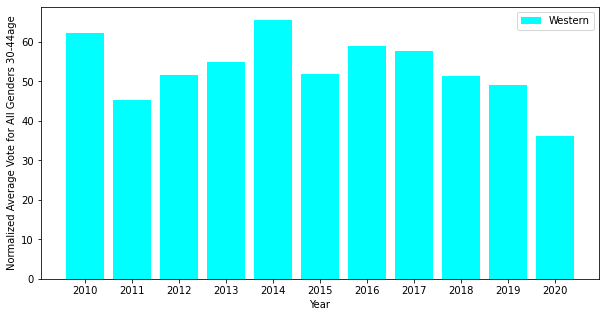

In [27]:
df_we = df_merge[(df_merge['Western'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_we_min = df_we['allgenders_30age_avg_vote'].min()
df_we_max = df_we['allgenders_30age_avg_vote'].max()
df_we['normalized_allgenders_30age_avg_vote'] = (df_we['allgenders_30age_avg_vote'] - df_we_min) / (df_we_max - df_we_min) * 100

ratings_we = df_we[df_we['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_we.keys(), ratings_we.values, color='cyan', label='Western')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

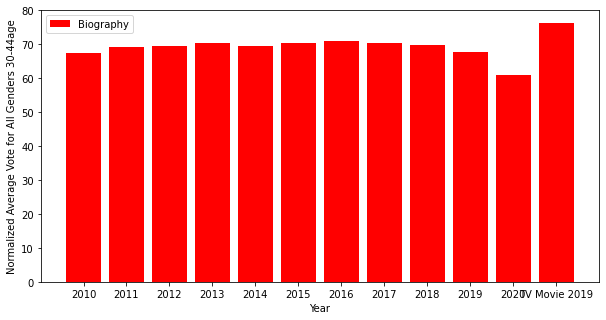

In [28]:
df_b = df_merge[(df_merge['Biography'] == 1) & (df_merge['allgenders_30age_avg_vote'].notnull()) & (df_merge['allgenders_30age_avg_vote']!=0) & (df_merge['year']>='2010')].copy()
df_b_min = df_b['allgenders_30age_avg_vote'].min()
df_b_max = df_b['allgenders_30age_avg_vote'].max()
df_b['normalized_allgenders_30age_avg_vote'] = (df_b['allgenders_30age_avg_vote'] - df_b_min) / (df_b_max - df_b_min) * 100

ratings_b = df_b[df_b['normalized_allgenders_30age_avg_vote']!=0].groupby('year')['normalized_allgenders_30age_avg_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_b.keys(), ratings_b.values, color='red', label='Biography')
plt.xlabel('Year')
plt.ylabel('Normalized Average Vote for All Genders 30-44age')
plt.legend()
plt.show()
None

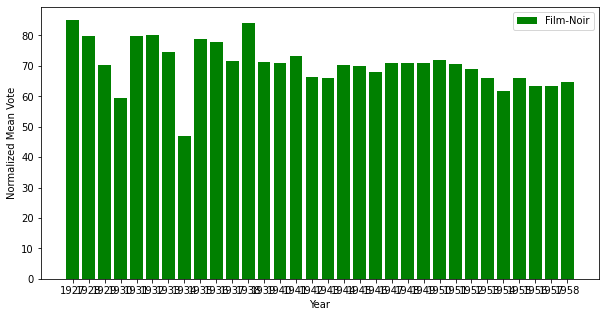

In [49]:
df_fn = df_merge[(df_merge['Film-Noir'] == 1) & (df_merge['mean_vote'].notnull()) & (df_merge['mean_vote']!=0) ].copy()
df_fn_min = df_fn['mean_vote'].min()
df_fn_max = df_fn['mean_vote'].max()
df_fn['normalized_mean_vote'] = (df_fn['mean_vote'] - df_fn_min) / (df_fn_max - df_fn_min) * 100

ratings_fn = df_fn[df_fn['normalized_mean_vote']!=0].groupby('year')['normalized_mean_vote'].mean()

plt.subplots(figsize=(10,5))
plt.bar(ratings_fn.keys(), ratings_fn.values, color='g', label='Film-Noir')
plt.xlabel('Year')
plt.ylabel('Normalized Mean Vote')
plt.legend()
plt.show()
None

The Film-Noir hasnt movie after the 1958 !!!!!!!!!!!!!!!